In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import random
import cv2

In [5]:
# using kaggle api
! pip install -q kaggle

In [6]:
 from google.colab import files 
 files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"himanshunegi2000","key":"a1ea422bf7d93d3f041b83e706e7f9d5"}'}

In [7]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [8]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [9]:
! kaggle datasets list # Testing api

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              229KB  2021-05-29 17:43:56           6271  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           3576  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1245  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27           1989  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [10]:
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

 95% 314M/330M [00:03<00:00, 141MB/s]
100% 330M/330M [00:03<00:00, 90.5MB/s]


In [ ]:
!unzip face-mask-12k-images-dataset.zip 

## **Data has beeen set on colab**

In [12]:
# Directory
train_dir = "./Face Mask Dataset/Train"
val_dir = "./Face Mask Dataset/Validation"
test_dir = "./Face Mask Dataset/Test"

classes = ["With Mask", "Without Mask"]

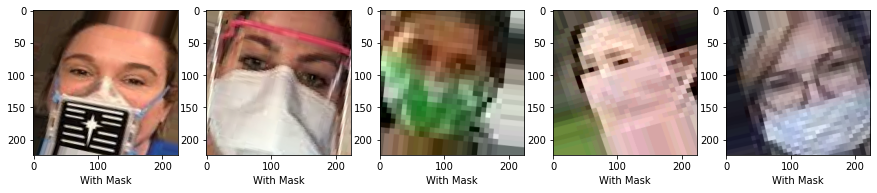

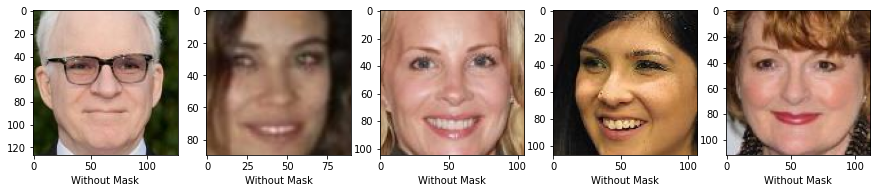

In [13]:
n = 5

plt.figure(figsize=(15, n))
for i in range(n):
    sample = random.choice(os.listdir(train_dir + "/WithMask"))
    img_dir = train_dir + "/WithMask/" + sample
    img = cv2.imread(img_dir)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, n, 1+i)
    plt.imshow(img)
    plt.xlabel("With Mask")
plt.show()   

plt.figure(figsize=(15, n))
for i in range(n):
    sample = random.choice(os.listdir(train_dir + "/WithoutMask"))
    img_dir = train_dir + "/WithoutMask/" + sample
    img = cv2.imread(img_dir)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, n, 1+i)
    plt.imshow(img)
    plt.xlabel("Without Mask")
plt.show()   

In [14]:
from keras.preprocessing.image import ImageDataGenerator

In [15]:
# Dataset Loader
train_datagen = ImageDataGenerator(
                                rescale=1./255,
                                rotation_range=0.2,
                                #width_shift_range=0.1,
                                #height_shift_range=0.1,
                                shear_range=0.2,
                                #zoom_range=0.09,
                                horizontal_flip=True,
                                vertical_flip=False,
                                #validation_split=0.1
                                )

val_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
# Image Generator Config
target_size = (150, 150)
batch_size = 16

# Load Dataset
train_dataset = train_datagen.flow_from_directory(train_dir,
                                                  target_size=target_size,
                                                  batch_size=batch_size,
                                                  class_mode="categorical",
                                                  shuffle=True)

val_dataset = val_datagen.flow_from_directory(val_dir,
                                              target_size=target_size,
                                              batch_size=batch_size,
                                              class_mode="categorical",
                                              shuffle=False)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


## Deep Learning Model

In [18]:
!pip install keras

In [20]:
import keras
from keras import layers
from tensorflow.keras.applications import MobileNetV2

# Initiate Baseline Model
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(150, 150, 3))

9412608/9406464 [==============================] - 0s 0us/step


In [21]:
# Freezing Layer
for layer in base_model.layers:
    layer.trainable = False

In [22]:
model = keras.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(2, activation="softmax"))

In [24]:
## Setting backprop of model (how this model learning)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics ="accuracy")

In [25]:
# Training
history = model.fit_generator(train_dataset,
                               steps_per_epoch=len(train_dataset)//train_dataset.batch_size,
                               validation_data=val_dataset, 
                               validation_steps=len(val_dataset)//val_dataset.batch_size,
                               epochs=10, 
                               )

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
39/39 [==============================] - 33s 318ms/step - loss: 0.4982 - accuracy: 0.9067 - val_loss: 1.4131e-06 - val_accuracy: 1.0000
Epoch 2/10
39/39 [==============================] - 12s 300ms/step - loss: 0.3211 - accuracy: 0.9754 - val_loss: 0.2314 - val_accuracy: 0.9792
Epoch 3/10
39/39 [==============================] - 12s 300ms/step - loss: 0.0524 - accuracy: 0.9859 - val_loss: 1.0105e-04 - val_accuracy: 1.0000
Epoch 4/10
39/39 [==============================] - 12s 299ms/step - loss: 0.2404 - accuracy: 0.9882 - val_loss: 3.6250e-05 - val_accuracy: 1.0000
Epoch 5/10
39/39 [==============================] - 12s 298ms/step - loss: 0.0928 - accuracy: 0.9894 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
39/39 [==============================] - 12s 299ms/step - loss: 0.4330 - accuracy: 0.9767 - val_loss: 0.1824 - val_accuracy: 0.9792
Epoch 7/10
39/39 [==============================] - 12s 299ms/step - loss: 0.1274 - accuracy: 0.9849 - val_loss: 0.0020 - val_

## Reviewing

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 5, 5, 1280)        2257984   
_________________________________________________________________
flatten (Flatten)            (None, 32000)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 64002     
Total params: 2,321,986
Trainable params: 64,002
Non-trainable params: 2,257,984
_________________________________________________________________


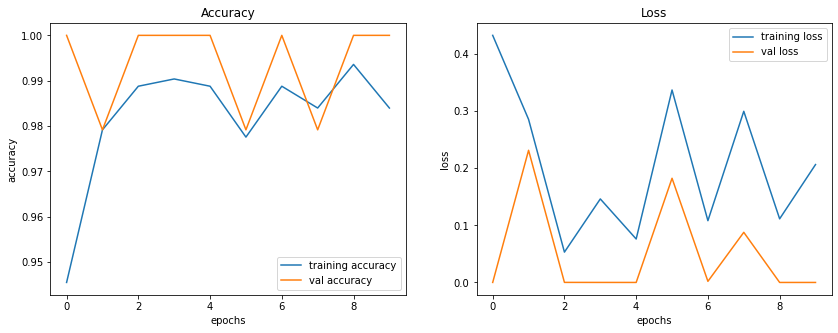

In [26]:
## Review Our Model
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(14,5))
grid = gridspec.GridSpec(ncols=2,nrows=1,figure=fig)
fig.add_subplot(grid[0])
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

fig.add_subplot(grid[1])
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

#plt.savefig("Training_result.jpg",dpi=300)

In [27]:
# Load Test Dataset
test_dataset = val_datagen.flow_from_directory(test_dir,
                                            target_size=target_size,
                                            batch_size=1,
                                            class_mode=None,
                                            shuffle=False)

Found 992 images belonging to 2 classes.


In [29]:
probabilities = model.predict_generator(test_dataset)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [30]:
y_pred = probabilities.argmax(axis=-1)
y_test = test_dataset.classes

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

In [32]:
print("Accuracy Score of Model:", accuracy_score(y_pred,y_test))

Accuracy Score of Model: 0.9909274193548387


In [38]:
import plotly.express as px
sns.set_style('whitegrid')
f = px.imshow(confusion_matrix(y_test,y_pred))
f.show()

# Test with Visualization

In [39]:
import glob
import random

In [40]:
def preprocessing_img(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (150, 150))
    img = np.array(img)
    img = np.expand_dims(img, axis=0)
    img = img/255
    return img


./Face Mask Dataset/Test/WithMask/Augmented_553_7964791.png


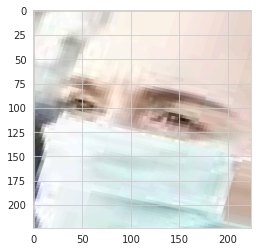

In [41]:
random_test_img = random.choice(glob.glob(test_dir+"/*/*"))
print(random_test_img)
img_test = cv2.imread(random_test_img)
img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)
plt.imshow(img_test)
plt.show()

In [42]:
img_test = preprocessing_img(img_test)
result = model.predict(img_test)
score = np.max(result)
predicted_class = classes[np.argmax(result)]
print(predicted_class)
print("Confident: ", score)

With Mask
Confident:  1.0


# Save Model

In [ ]:
model.save("face-masked-detection.h5")